In [1]:
from pylab import *

$$
\frac{dP}{dt}=aP(t) \left( 1-\frac{P(t)}{P_c}\right)
$$
$$
\frac{d\vec x}{dt}=\vec g(\vec x;t)
$$
$$
\vec x_{n+1}=\vec x_n+\delta*\vec x_n
$$

In [2]:
def mod_log(t,p,a=1):
    return a*p(1-(p/pc))

def expl_02(df,t, f_ini):
    delta=t[1]-t[0]
    f_sol=zeros_like(t)
    f_sol[0]=f_ini
    for i in range(0,len(t)-1):
        f_sol[i+1]= f_sol[i+1]+delta*df(t[i])

$$
\frac{d\vec x_{n+1}}{dt}=g(\vec x,t)
$$

$$
\vec x_{n+1}=\vec x_n +\delta \vec g(\vec x_n,t_n)+\frac{1}{2} \delta^2 \mathbb{J}\cdot\vec g(\vec x_n,t_n)
$$

In [23]:
def ode_exp(f,t_intervalo,y0,jac, delta=0.01):
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol=zeros_like(t)
    sol[0]=y0 #punto inicial
    for i in range(len(t)-1):#porque ya pusimos el punto inicial
        sol[i+1]=sol[i]+delta*f(t[i],sol[i])+0.5*(delta**2)*jac(t[i],sol[i])*f(t[i],sol[i])
    return(t,sol)

$$
\frac{dP}{dt}=aP(t) \left( 1-\frac{P(t)}{P_c}\right)
$$


In [24]:
def mod_log(t,p,a=1,pc=1):
    return a*p*(1-(p/pc))

def jac_mod_log(t,p,a=1,pc=1):
    return a-2*a*(p/pc)

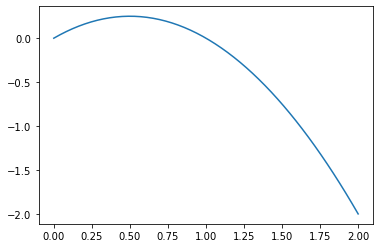

In [25]:
t,p= 0,linspace(0,2)
plot(p,mod_log(t,p))

In [41]:
import matplotlib.pyplot as plt

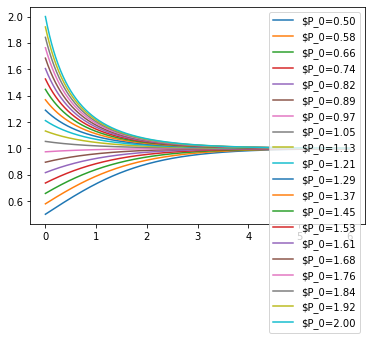

In [43]:
cond_ini=linspace(0.5,2,20)
for ini in cond_ini:
    sol=ode_exp(mod_log,(0,6),ini,jac_mod_log)
    plot(sol[0],sol[1],label=r'$P_0=%2.2f' %(ini)) 

legend()
show()

$$
\vec x_{n+1}=\vec x_n \delta\vec g\left( \vec x_n +\frac{\delta}{2}\delta \vec g\left( \vec x_n,t_n \right),t_n+\frac{\delta}{2} \right) 
$$

In [44]:
def RK2(f, t_intervalo, y0, delta=0.01):
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol=zeros_like(t)
    sol[0]=y0
    for i in range(len(t)-1):
        vec_n=sol[i]+0.5*delta*f(t[i],sol[i])
        sol[i+1]=sol[i]+delta*f(t[i]+0.5*delta,vec_n)
    return(t,sol)

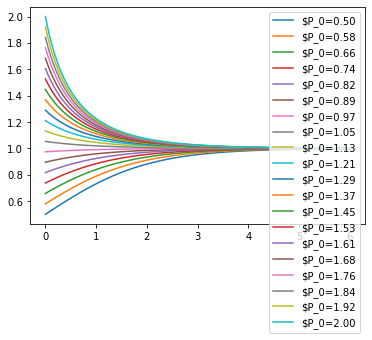

In [45]:
cond_ini=linspace(0.5,2,20)
for ini in cond_ini:
    sol=RK2(mod_log,(0,6),ini)
    plot(sol[0],sol[1],label=r'$P_0=%2.2f' %(ini)) 

legend()
show()